In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import ariel_load
import ariel_model
import ariel_simple
import copy
import tqdm
kgs.sanity_checks_active = True
kgs.sanity_checks_without_errors = True

local


In [2]:
train_data = kgs.load_all_train_data()[980:]
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(119, 1)

In [3]:
loaders = ariel_load.default_loaders()
# loaders[0].cache_steps = []
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
model = ariel_simple.SimpleModel()
model.train(train_data)

In [3]:

model.infer(train_data+test_data);
# for d in tqdm.tqdm(train_data+test_data):
#     dd = copy.deepcopy(d)
#     for t in dd.transits:
#         t.load_to_step(5,dd,loaders)
    #kgs.print_sanity_checks()
# model = ariel_model.baseline_model()
# data = train_data
# model.train(data)
# inferred_data = model.infer(data)
# kgs.score_metric(inferred_data, data)

Inferring: 100%|██████████████████████████████████████████████████████████████████████| 120/120 [02:12<00:00,  1.10s/it]


In [4]:
kgs.print_sanity_checks()

n_transits [1.0, 2.0] [1, 2] 1
simple_t0 [3.031068158387781, 4.499074677719392] [2.5, 5] 11
simple_residual_diff_FGS [0.9740260862074701, 1.253135283379588] [-0.0001, 0.00012] 12
simple_residual_diff_AIRS [0.9670650181756142, 1.253317186611153] [-0.0001, 0.00015] 13


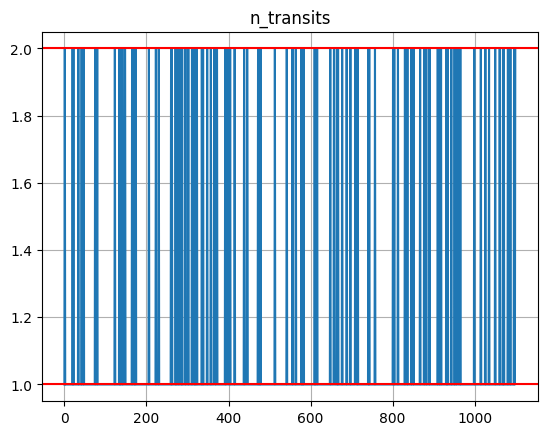

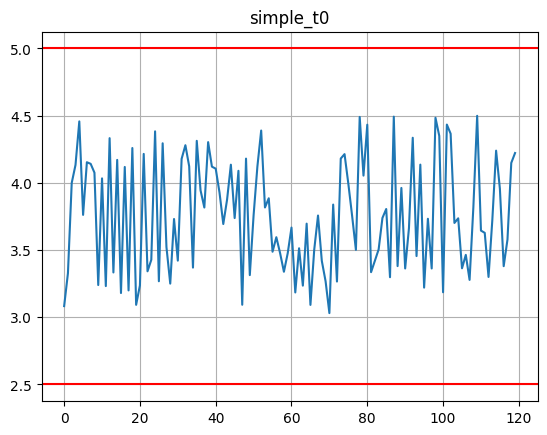

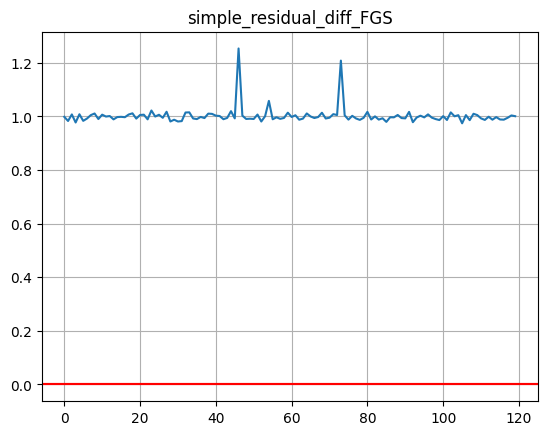

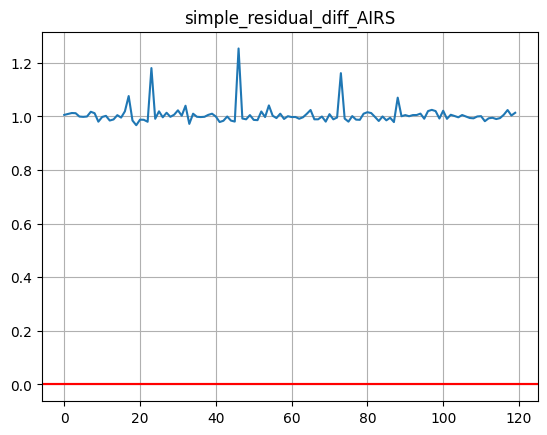

In [5]:
kgs.plot_sanity_checks()

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [24]:
inds=np.argsort(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[:100])
inds[-1], kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[inds[-1]]



(46, 1.253317186611153)

In [4]:
train_data = kgs.load_all_train_data()

29


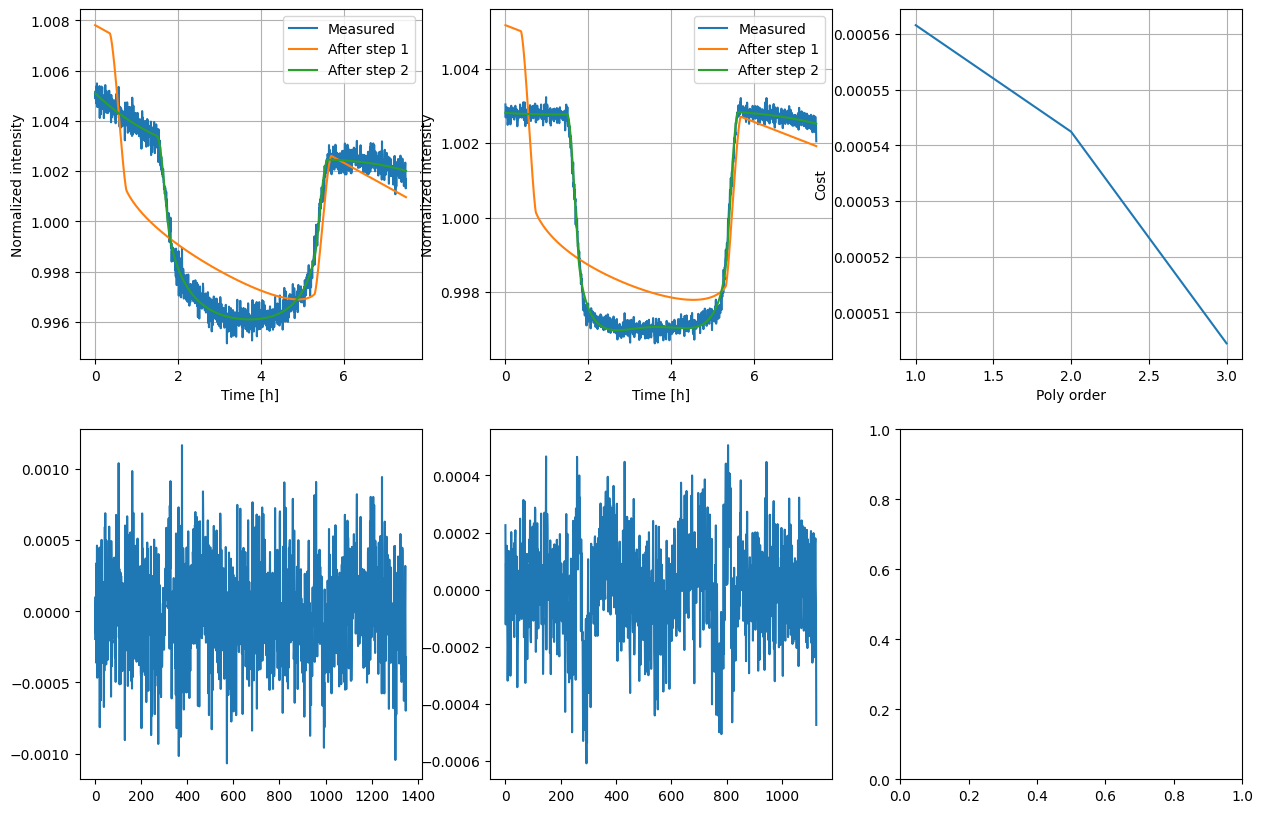

sanity back
1.1840164637728403
1.0324738817392438


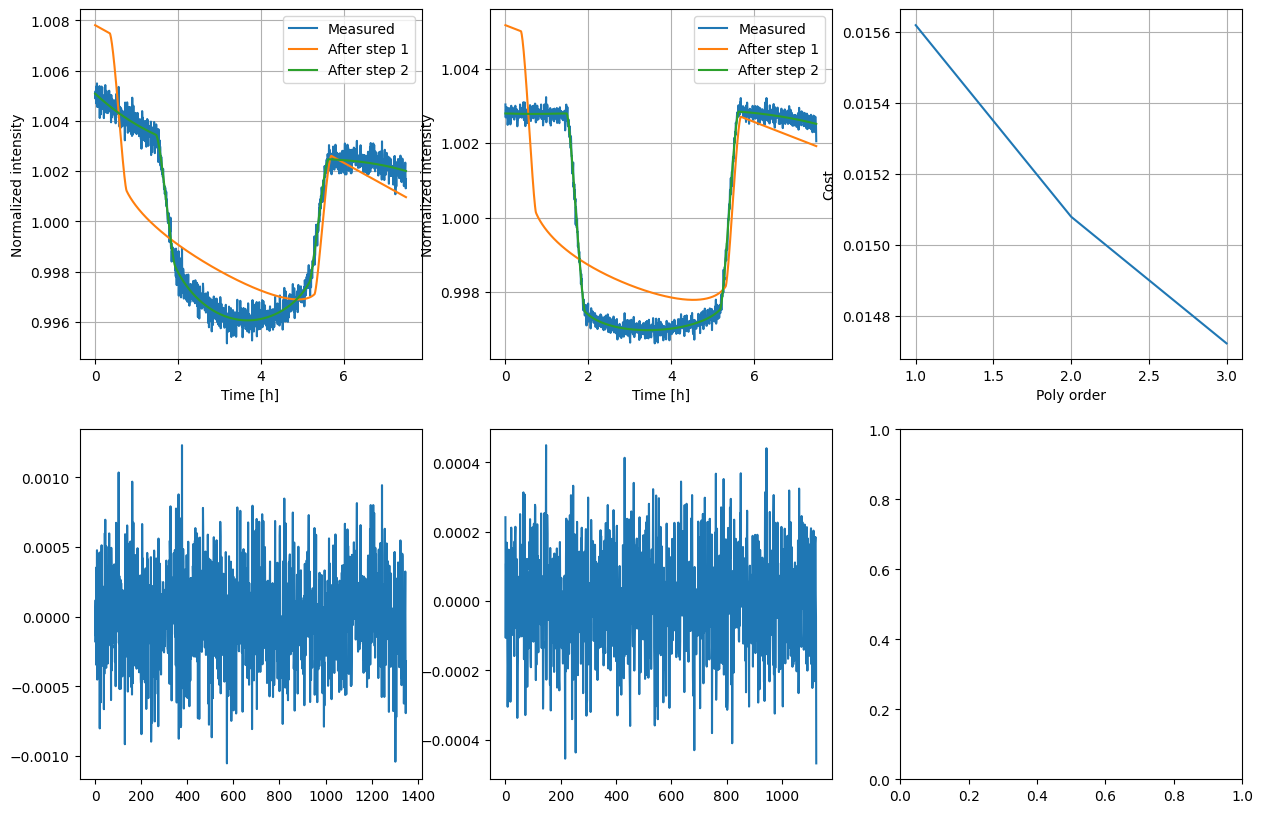

sanity back
1.0010160703647477
1.0046645576966882


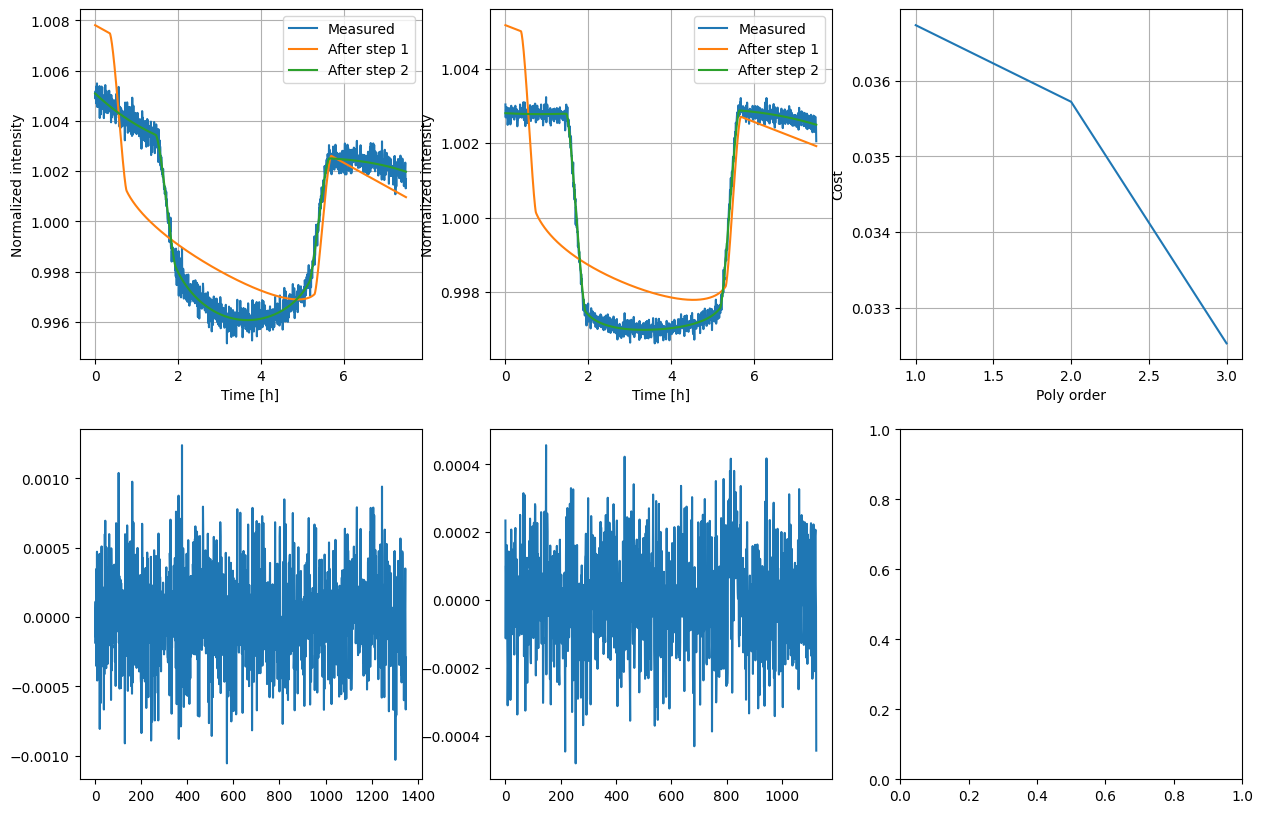

sanity back
1.0253637534901008
1.0009504431133385


In [6]:
ind = 29#inds[-1] # 23, 46

print(ind)
#ind = 29
d = copy.deepcopy(train_data[ind])
model.do_plots=True
model.weights = [1,1]
dd=model.infer([d])
print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
d = copy.deepcopy(train_data[ind])
#d.transit_params = train_data[1].transit_params
model.weights = [1,100]
dd=model.infer([d])
#print(dd[0].diagnostics['transit_params'])
print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
model.weights = [100,1]
dd=model.infer([d])
#print(dd[0].diagnostics['transit_params'])
model.do_plots=False
print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
#

0.6733371082364351
-4.697924879203755
-5.18090609614428


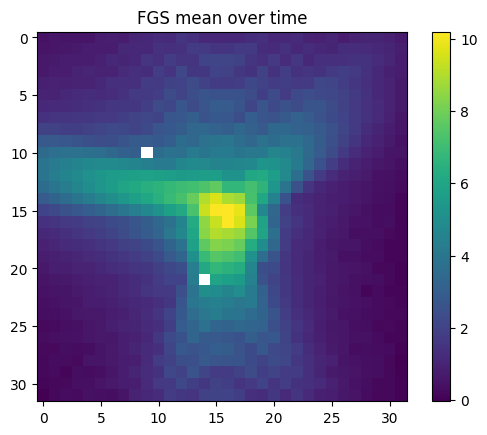

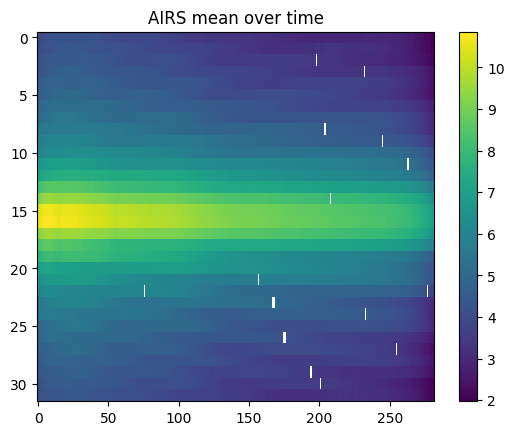

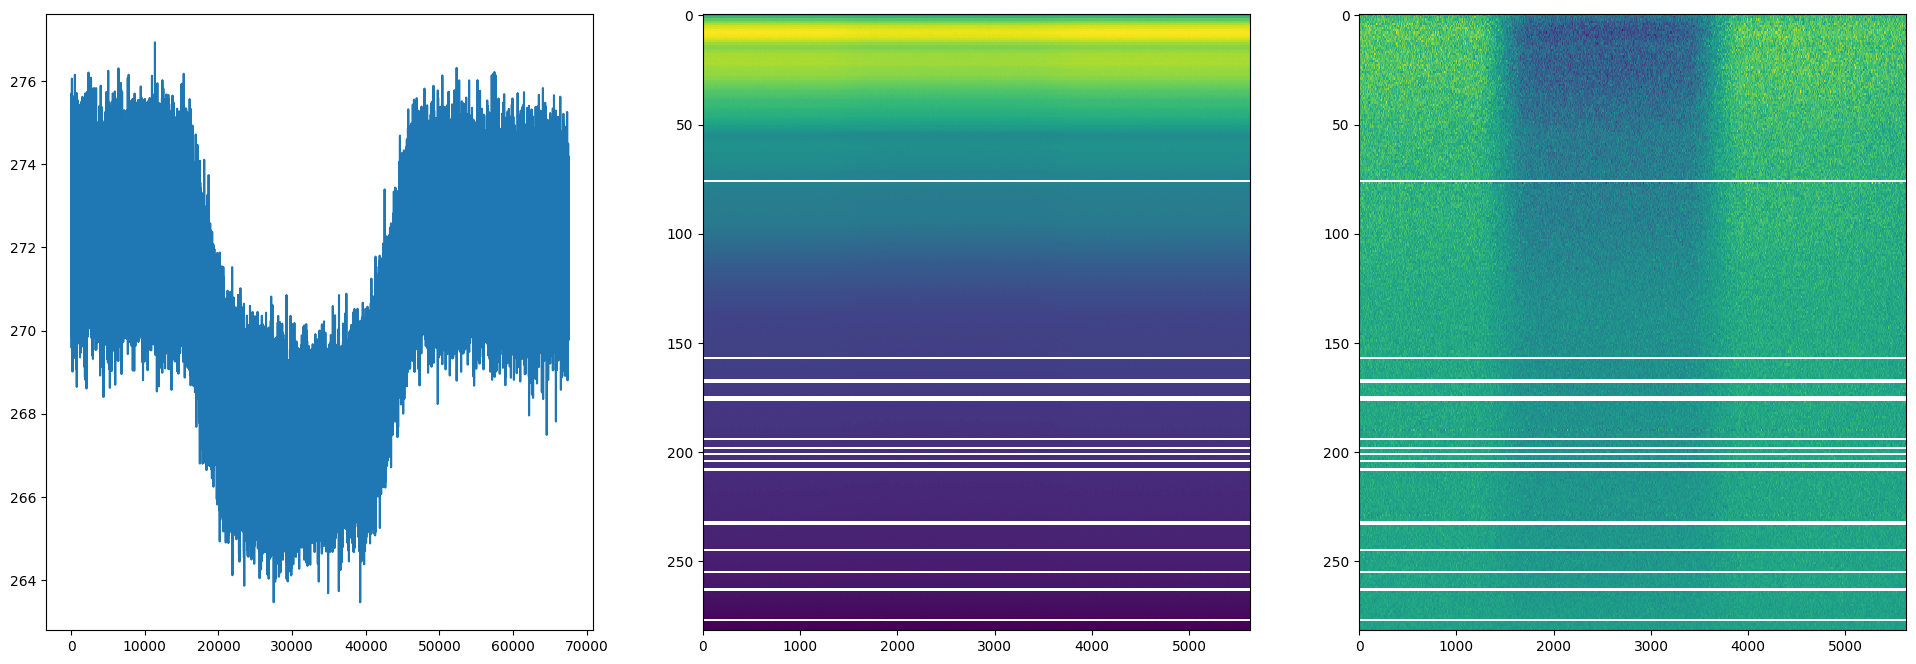

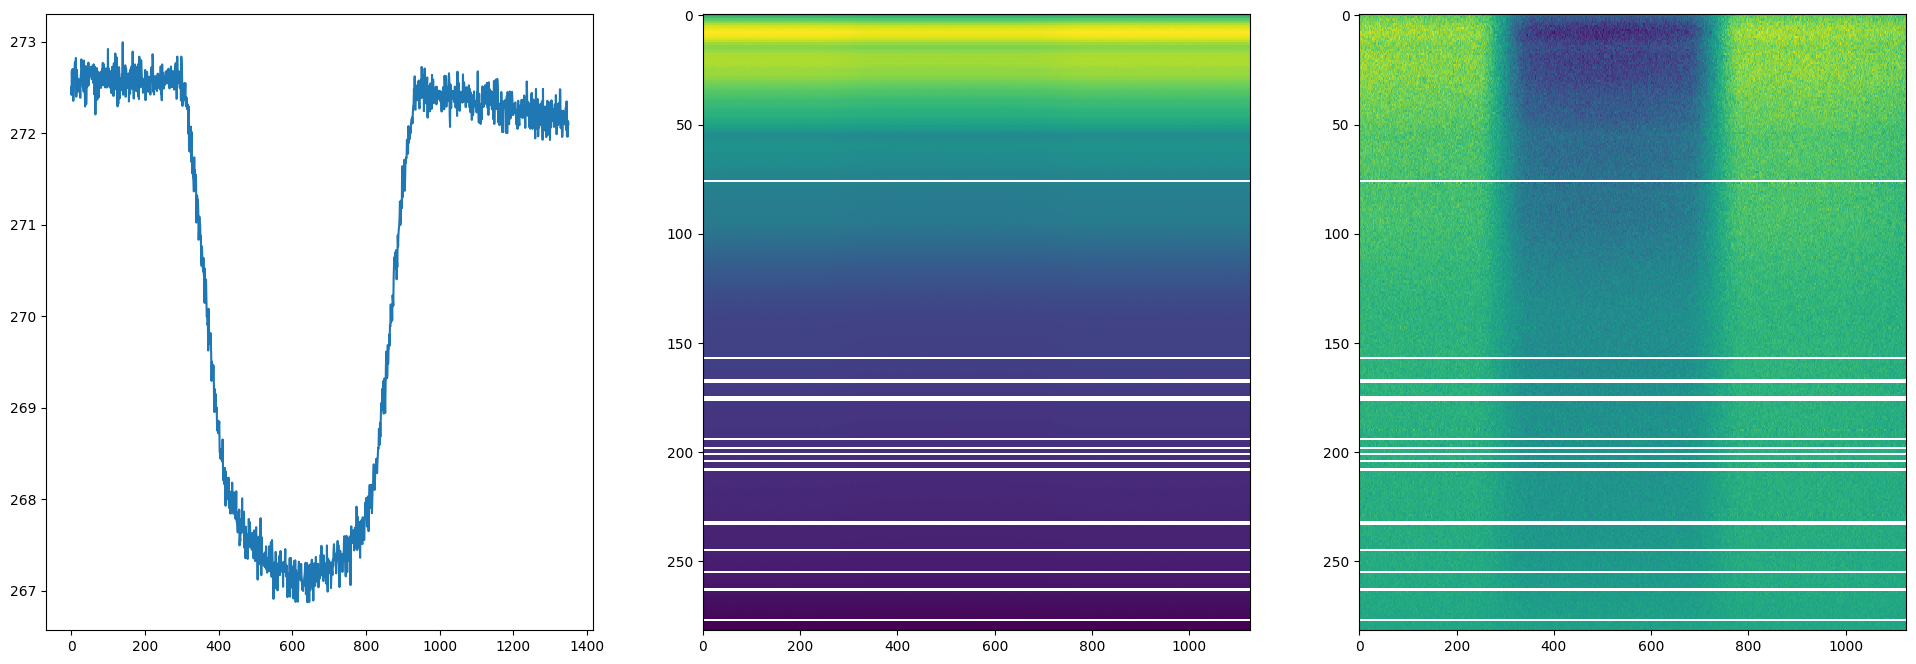

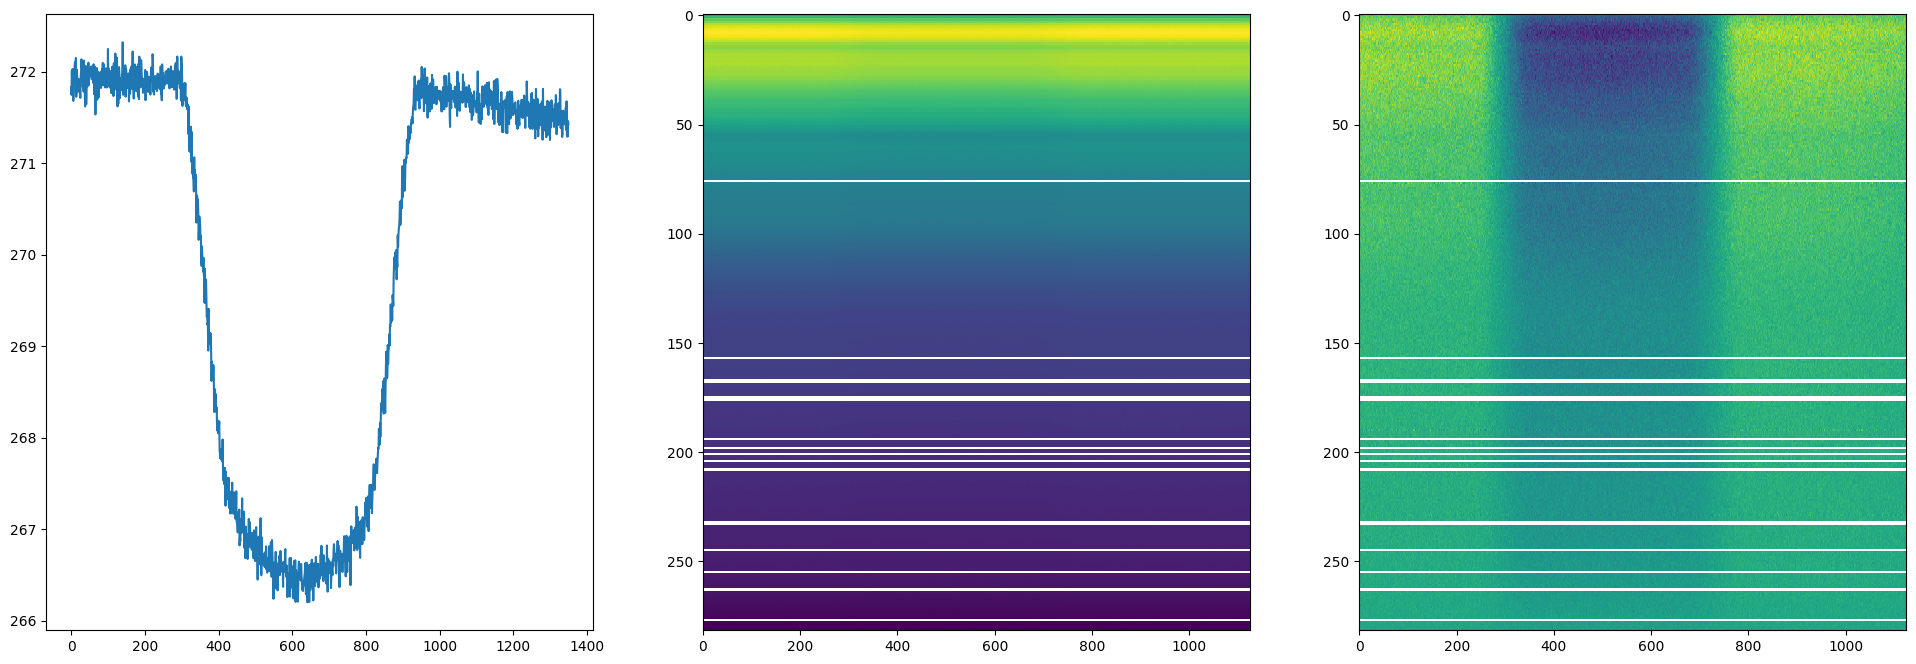

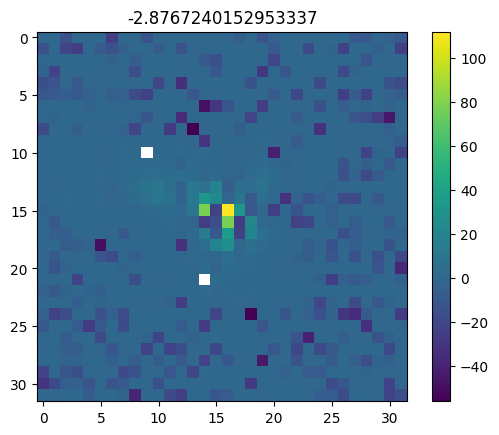

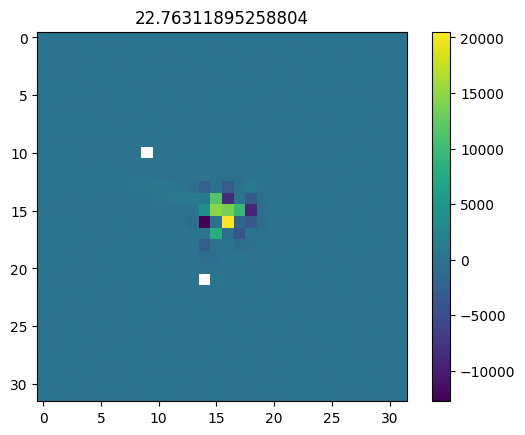

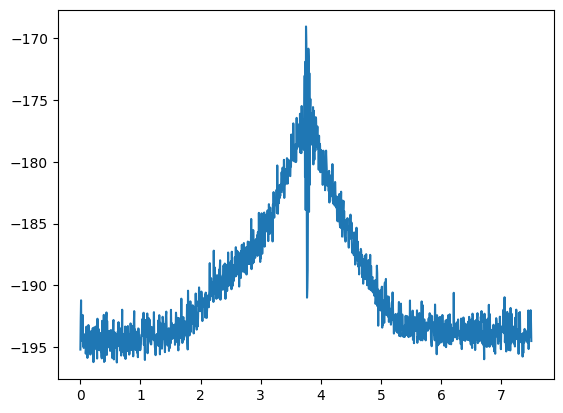

min 0.0 0.0


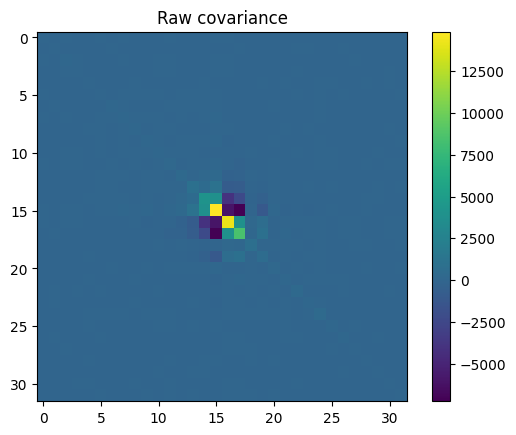

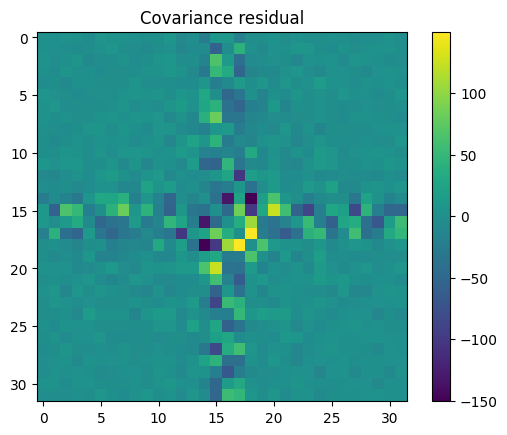

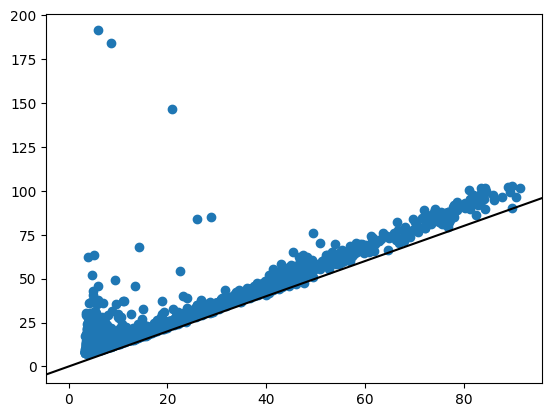

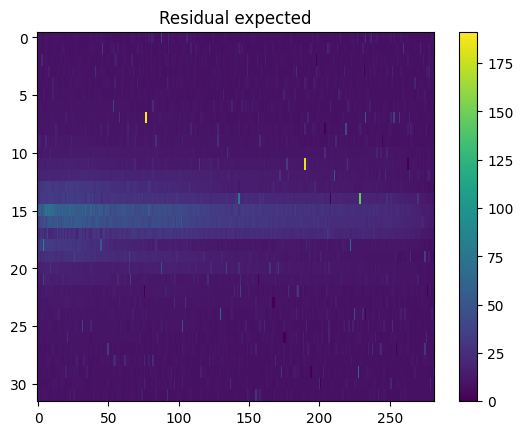

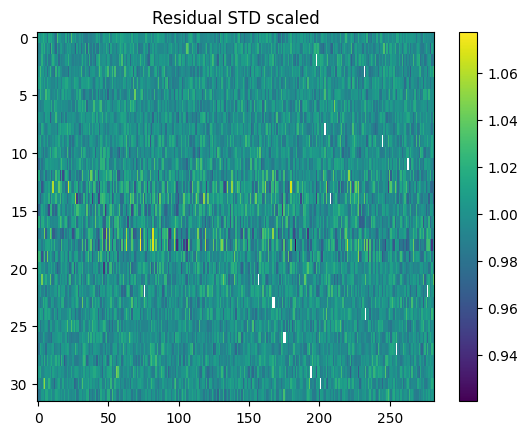

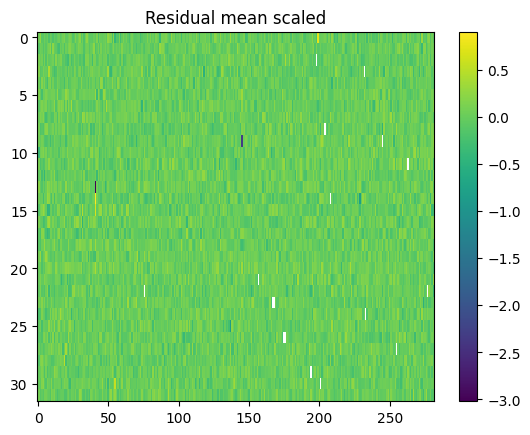

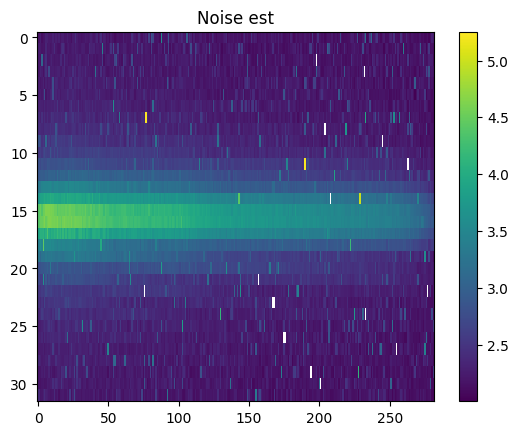

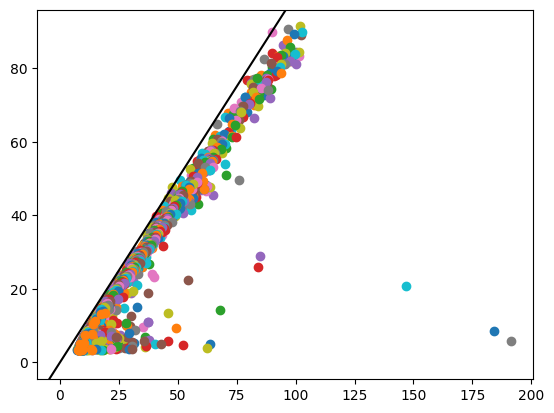

In [11]:
import ariel_load
import ariel_load_FGS
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)

In [22]:
ind

29

In [ ]:
d.diagnostics['